<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/t9/T9_d30_Pop_H_Frannk_Sphere_1500_0_5F_DE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 16.46 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight


In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 257 (delta 70), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (257/257), 656.89 KiB | 17.29 MiB/s, done.
Resolving deltas: 100% (142/142), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [ ]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=5000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

fator = 1.0/2.0; 
Fi=mut;CRi=crossp;# para impressão
#fator = 2.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 18.40 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 257 (delta 70), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (257/257), 656.89 KiB | 25.26 MiB/s, done.
Resolving deltas: 100% (142/142), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One


In [ ]:
############################### Função
import Function
#'''  
############################### Função
dim=30
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel' #'Schwefel_222'
fchoice='Sphere'
Fun=Function.Sphere
#MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)
#fx=
#'''
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [ ]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [ ]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.5
Npar1= 52
Npar2= 16
Npar3= 16
Npar4= 16
Npar= 100


In [ ]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 4.009587999184927 FO= 2.7951273172173885e-120
k= 1 time= 8.007355844974517 FO= 1.8047215724964124e-120
k= 2 time= 11.991685342788696 FO= 1.1393965577118302e-119
k= 3 time= 15.678472459316254 FO= 1.4978120773533615e-120
k= 4 time= 19.357794296741485 FO= 3.710978889951348e-120
k= 5 time= 23.044125533103944 FO= 2.7754484307961016e-120
k= 6 time= 26.72990364631017 FO= 2.7449131326557953e-121
k= 7 time= 30.388020956516264 FO= 6.16689514516669e-120
k= 8 time= 34.0535929163297 FO= 4.310281690550974e-121
k= 9 time= 37.711431101957956 FO= 4.658747940561638e-120
k= 10 time= 41.36130465269089 FO= 2.8672159881026378e-120
k= 11 time= 45.016717803478244 FO= 2.5051371287060535e-121
k= 12 time= 48.66822183529536 FO= 5.263371468089891e-121
k= 13 time= 52.32375556230545 FO= 2.1727887909921365e-120
k= 14 time= 55.9760621825854 FO= 5.283709139930248e-122
k= 15 time= 59.627646398544314 FO= 2.497715267711262e-120
k= 16 time= 63.28154202699661 FO= 7.655967301126682e-121
k= 17 time= 66.927494215965

In [ ]:
#len(X2[1,:])
print(cols)

30


In [ ]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [ ]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0         3.060839e+02  9.856784e-01  0.000069         0.0      0.0  52.0   
1         2.922202e+02  9.410334e-01  0.000139         1.0      2.0  52.0   
2         2.859461e+02  9.208289e-01  0.000208         1.0      2.0  52.0   
3         2.780406e+02  8.953710e-01  0.000277         1.0      2.0  52.0   
4         2.710837e+02  8.729678e-01  0.000347         1.0      2.0  52.0   
...                ...           ...       ...         ...      ...   ...   
4995      7.513698e-61  2.419628e-63  0.346389         1.0      1.0  52.0   
4996      7.329847e-61  2.360422e-63  0.346459         0.0      0.0  52.0   
4997      7.237485e-61  2.330679e-63  0.346528         1.0      1.0  52.0   
4998      6.994754e-61  2.252513e-63  0.346597         1.0      1.0  52.0   
4999      6.884792e-61  2.217102e-63  0.346667         1.0      1.0  52.0   

            Fo       CRo           fmin           fmax  AD_fmin  AD_fmax  \

Text(0, 0.5, 'CR')

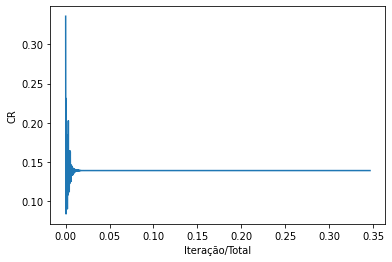

In [ ]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

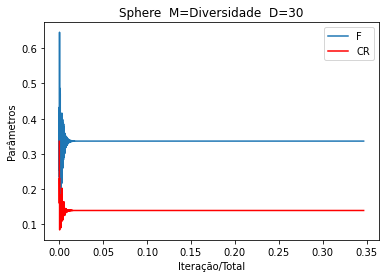

In [ ]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Sphere_Diversidade_D=30')

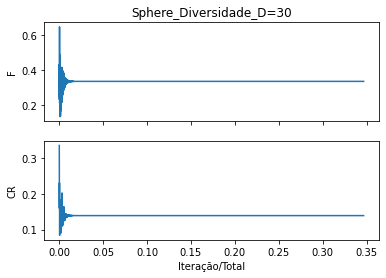

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [ ]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.50 NPAR= 100 Iterações= 5000 Dim= 30 Min/Max= -100 / 100 _ Sphere
SUB_Fo-0.5_CRo-0.5_D-30_Interv-5000 

MÉDIA:  1.473652450164522e-103 STD __: 6.708550962953883e-103
MIN __: 4.435297512977412e-122 MAX__:  4.409704073289896e-102
1.473652450164522e-103
6.708550962953883e-103
4.435297512977412e-122
Tempo Médio= 219.513 segundos ---
50 Rodadas

BEST:  [ 5.65193125e-063  5.54156051e-062  1.52400896e-062  5.64919515e-062
 -2.11452025e-063 -3.76137428e-062 -7.06218486e-064 -1.46908350e-062
  6.95792078e-062 -1.84569508e-062  6.76129343e-062 -3.05804977e-062
 -2.41997332e-062 -1.20564989e-062  4.08314185e-062 -3.38318457e-062
 -8.78454075e-063  5.04856139e-062  1.09753461e-062 -3.94001901e-063
  2.78415584e-062  6.54337233e-062 -3.51334197e-062  1.73651885e-062
 -3.10860400e-062  1.38088411e-062 -6.61616515e-062 -7.85921605e-062
  2.84309196e-062 -9.24969716e-063  4.43529751e-122]
